# <center> Nonparametric Statistics </center>

## <center> An Introduction </center>

<center> Maxwell Sherman </center>
<center> 11/02/2017 </center>

***

## Overview

* The Central Limit theorem revisited
* Nonparametric statistics in general
* The Wilcoxon signed-rank test
* The Wilcoxon rank sum test
* Multi-group testing
* Advantages and disadvantages

***

# <center> The Central Limit Theorem 2.0 </center>

## Recall from Lecture 2:

Let $X_i$ be observations from some probability distribution with mean $\mu$ and variance $\sigma^2$.

Then we can estimate the true mean of $X$ ($E[X]$) using the sample mean:

<center> $\bar{x} = \frac{1}{n} \sum_{i=1}^{n} X_i$ </center>

Remarkably: 

<center>$\bar{x} \sim N(0, \frac{\sigma^2}{n}$)</center>

We've seen from Giorgio how this applies to the gamma distribution...how about others?.

Let's say we have a bunch of $\bar{x}$: $\{\bar{x}_1,\bar{x}_2,...,\bar{x}_n\}$<br>

How can we evaluate if the CLT applies?

Well $$\bar{x_i} \sim N\left(\mu, \frac{\sigma^2}{n}\right) \rightarrow \sqrt{n}\frac{(\bar{x}_i-\mu)}{\sigma} \sim N(0, 1)$$ 
<center>(Can you show this?)</center>

So let's check that the normalized $\bar{x_i}$ follow a standard normal distribution.

## What does this look like in R?

Let's use the binomial distribution with n=100, p=0.25

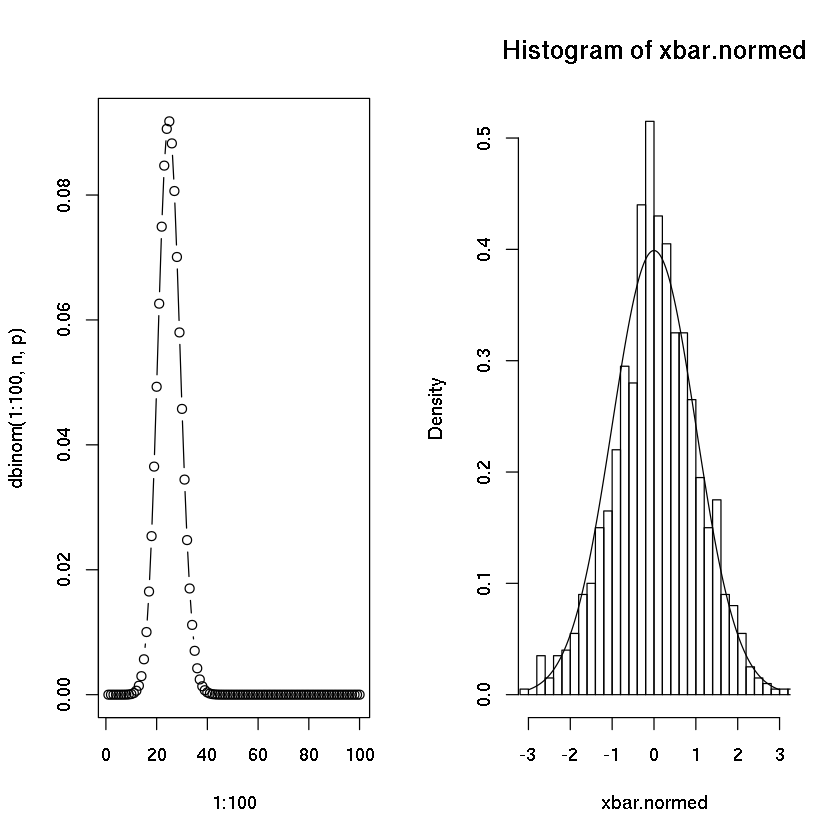

In [3]:
n   <- 100
p   <- 0.25
mu  <- n * p
var <- n * p * (1-p)
sig <- sqrt(var)

par(mfrow=c(1, 2))
plot(1:100, dbinom(1:100, n, p), type='b')  # plot the probability density function

n.outer <- 1000  # number of xbar
n.inner <- 50    # number of draws per xbar (n for sample mean calculation)

xbar.list <- sapply(1:n.outer, function(x) mean(rbinom(n.inner, n, p)))  # simulate from the binomial
xbar.normed <- sapply(xbar.list, function(x) sqrt(n.inner) * (x - mu) / sig) #
hist(xbar.normed, breaks=30, freq=F, xlim=c(-3, 3))
lines(seq(-3, 3, 0.01), dnorm(seq(-3, 3, 0.01)))

## The Central Limit Theorem (formally)

Let $X_1, X_2, ..., X_n$ be **independent and identically distributed** random variables **with** $E[X_i] = \mu <\infty$ and $Var(X_i) = \sigma^2 <\infty$

Define $$\bar{X} = \frac{1}{n}\sum_{i=1}^n X_i.$$

Then $$\lim_{n\to\infty} \sqrt{n} \frac{(\bar{X} - \mu)}{\sigma} \sim N(0, 1).$$

## Why does the Cauchy distribution violate the CLT?

The standard Cauchy distribution has the probability density function:
$$f(x) = \frac{1} {\pi (1 + x^2)}$$

Let $X \sim f(x)$. It can be shown
1. $E[X]$ is undefined (not so easy)
2. $Var(X)$ is not finite (easy)

$$E[X^2] \propto \int_{-\infty}^{\infty} \frac{x^2}{1+x^2} dx = \int_{-\infty}^{\infty} 1 - \frac{1}{1+x^2}
   = \int_{-\infty}^{\infty} dx + \tan^{-1}(x)\Big|_{-\infty}^{\infty} = \infty$$

***

# <center>Nonparametric statistics overview</center> 

## Beyond the Central Limit Theorem

When we have a small sample size, the t-test requires:
* the data are generated from a normal distribution.

When we have a large sample size, the CLT tells us everything is normal...except the central limit theorem can fail when:
* observations are not identically distributed (outliers).
* observations are not independent (correlation).
* Variance is not (obviously) finite.

What do we do if we have a small sample size and fear non-normality?<br>
What do we do if we have a large sample size but fear the *iid* assumption is not valid?

**<center>Nonparametric statistics</center>**

## What does "nonparametric" mean?

**Parametric** statistics: assume the data come from a distribution defined by the values of a finite number of parameters.
* We infer these parameters from the data itself.
* E.g. the t-test is a parametric model of mean ($\mu$) and variance ($S$).

**Nonparametric** statistics: everything else
* Models with no parameters
* Models with an infinite number of parameters (yes, this is confusing)
* What nonparametric models have we already seen?

## General approach of nonparametric methods

The steps are largely the same as parametric testing:
1. Record a random selection of observations
2. Specify null and alternate hypotheses
3. Calculate a test statistic
4. Accept or reject null based on extremity of test statistic

Major difference: nonparametric methods work with rank (or order) of observations relative to each other.
* Models specified based on how we expect the ranks to behave.
* Implementations often still rely on the Central Limit Theorem for numerical stability.

***

# <center>Wilcoxon Signed-Rank Test</center>

## What is the Wilcoxon Signed-Rank Test?

Nonparametric version of the paired t-test

Samples from two groups are paired; test if the two groups have the same mean location.

Example:
* We want to test if a certain gene is differentially expressed in tumor cells
* Collect normal cells and tumor cells from each patient
* Measure expression in each tumor-normal pair
* Is the expression level different?

## Wilcoxon Signed-Rank Test method
**In theory**: If groups have the same mean, the difference between pairs should randomly be positive or negative. Many positive or negative pairs suggests different means.

In practice:
1. Calculate the difference between each pair, $D_i = X_i - Y_i$
2. Rank the pairs by absolute value of the differences from smallest to largest
    * If difference is zero, discard the pair and reduce n by 1.
    * Tied observations are assigned an average rank.
3. Sum the ranks with positive differences:
$$ T^+ = \sum_i R_i \cdot \mathbb{1}(D_i>0)$$

## Wilcoxon Signed-Rank Test Statistic

$H_0: D = 0 \qquad H_a: D \neq 0$ 

Under the null, the distribution of $T^+$ is complex, but it has finite mean and variance:
$$ E[T^+] = \mu = \frac{n(n+1)}{4}$$
$$Var(T^+) = \sigma^2  = \frac{n(n+t)(2n+1)}{24}$$
So for n large(-ish) the Central Limit Theorem tells us:
$$ Z = \frac{T^+ - \mu}{\sigma} \sim N(0, 1)$$

## An Example in R

Let's assume
* gene expression in tumor: $X_i \sim N(10, 5^2)$ <br>
* gene expression in normal: $Y_i \sim N(15, 5^2)$
* We have 25 pairs of observations

In [39]:
set.seed(123)  # set random seed so we always generate the same numbers

X.list <- rnorm(25, mean=10, sd=5)
Y.list <- rnorm(25, mean=15, sd=5)
D.list <- X.list - Y.list  # simulating from continous distributions, D_i will never be zero

df <- data.frame(X = X.list, Y=Y.list, D=D.list)  # make a dataframe
df.sort <- df[order(abs(D.list)), ]  # sort by absolute difference
df.sort$rank <- 1:nrow(df.sort)  # add the rank

T <- sum(df.sort$rank[df.sort$D > 0])  # manually calculate the T statistics
print(T)

[1] 27


In [41]:
w.test <- wilcox.test(X.list, Y.list, paired=T)  # Automatic calculation of T statistic with p-value
print(w.test)


	Wilcoxon signed rank test

data:  X.list and Y.list
V = 27, p-value = 7.498e-05
alternative hypothesis: true location shift is not equal to 0



***

# <center> Wilcoxon Rank Sum Test (Mann-Whitney U test) </center> 

## What is the Wilcoxon Rank Sum Test?

Nonparametric version of the unpaired, *equal-variance* t-test.

We have observations from two independent groups; test if the two populations have the same location. 

Intuitive motivation:
* If groups have the same location, then all observations should be approximately the same size. Once ordered, the rank sums of each group should be approximately proportional to their respective sizes. 

## Wilcoxon Rank Sum method
Suppose there are $n_1$ observations in group 1 and $n_2$ observations in group 2

1. Order all $n_1 + n_2$ observations.
2. Assign ranks from lowest to highest.
3. Sum the ranks belonging to group 2 observations:
$$ W = \sum_i^{n_1 + n_2} R_i \cdot \mathbb{1}(i \in \mathrm{Group 2}).$$
4. Calculate (Mann-Whitney):
$$ U = n_1 n_2 + \frac{n_1(n_1+1)}{2} - W.$$

## Wilcoxon Rank Sum statistic

For small sample sizes, the distribution of $W$ can be calculated directly with elementary probability.
For large sample sizes, we use the Central Limit Theorem:
$$ Z = \frac {U - \mu}{\sigma}$$
where:
$$\mu = \frac{n_1 n_2}{2}$$
$$\sigma^2 = \frac {n_1 n_2 (n_1 + n_2 + 1)}{12}$$

## An example in R

Suppose we are testing the effect of a new medication to decrease blood pressure
Group 1 is given the medication.
Group 2 is given placebo.
We collect the following observations:

|Group 1 Blood Pressure| Group 2 Blood Pressure |
| -------------------- | ---------------------- |
| 135                  | 160                    |
| 155                  | 145                    |
| 130                  | 175                    |
| 125                  | 140                    |

Is the treatment effective?

In [61]:
group.1 <- c(135, 155, 130, 125)
group.2 <- c(160, 145, 175, 140)
n1 <- length(group.1)
n2 <- length(group.2)
label.1 <- rep(1, n1)
label.2 <- rep(2, n2)

grouped <- c(group.1, group.2)  # Combined observations
labels <- c(label.1, label.2)   # Merge labels
labels.sort <- labels[order(grouped)]  # Sort labels based on order of observations

rank <- 1:length(grouped)
W <- sum(rank[labels.sort == 2])  # Sum the rank of group 2 observations (this is how R does it)
U <- n1*n2 + n1*(n1+1)/2 - W  # Manually determine U statistic
print(U)

[1] 2


In [62]:
# Automatically determine U statistic and p-value
wilcox.test(group.1, group.2)


	Wilcoxon rank sum test

data:  group.1 and group.2
W = 2, p-value = 0.1143
alternative hypothesis: true location shift is not equal to 0


***

# <center> Multi-group testing </center>

What if we have more than two groups to test?

* Parametric Statistcs: ANOVA
* Nonparametric Statistics: Kruskal-Wallis test

In summary:
* Paired t-test $\rightarrow$ Wilcoxon signed-rank test
* Unpaired (equal variance) t-test $\rightarrow$ Wilcoxon rank sum test (Mann-Whitney U Test)
* ANOVA $\rightarrow$ Kruskal-Wallis test

***

# <center>Advantages and Disadvantages </center>

## Advantages of nonparametric tests 

Nonparametric methods work well under very general assumptions about the underlying probability distributions.
* Nonparametric tests are robust to non-normality
    + Less sensitive to measurement errors
    + Less sensitive to outliers
    

* Nonparametric tests can apply even when the CLT does not
    + Observations come from a variety of distributions
    + Observations are correlated

* Nonparametric tests can be used on difficult-to-quantify data
    + e.g. Subjective evaluations (physician notes on a patient)

## Disadvantages of nonparametric tests

As a rule of thumb:<br>
**<center>Fewer assumptions = Less power</center>**

If the data really do come from normal distributions:

| Parametric | Nonparametric |
| ---------- | ------------- |
| More sensitive | Less sensitive |
| Confidence intervals easy | Confidence intervals hard |

***

# <center> Any questions? </center>